In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 



# **DATASET: California Housing**

- **MedInc**: reddito medio per agglomerato
- **HouseAge**: età media per agglomerato
- **AveRooms**: numero medio di stanze per nucleo abitativo in ogni agglomerato
- **AveBedrms**: numero medio di camere da letto 
- **Populaiont**: popolazione per agglomerato
- **AveOccup**: numero medio di occupanti per abitazione
- **Latitude**: latitudine dell'agglomerato
- **Longitude**: longitudine dell'agglomerato
- **MedHouseVal***: prezzo medio delle case (etichette)

In [62]:
housing = datasets.fetch_california_housing(as_frame=True)
df = housing.frame

display(df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


visualizziamo in una tabella con le sintesi descrittive dei dati


In [63]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# **ANALISI ESPLORATIVA (EDA)**

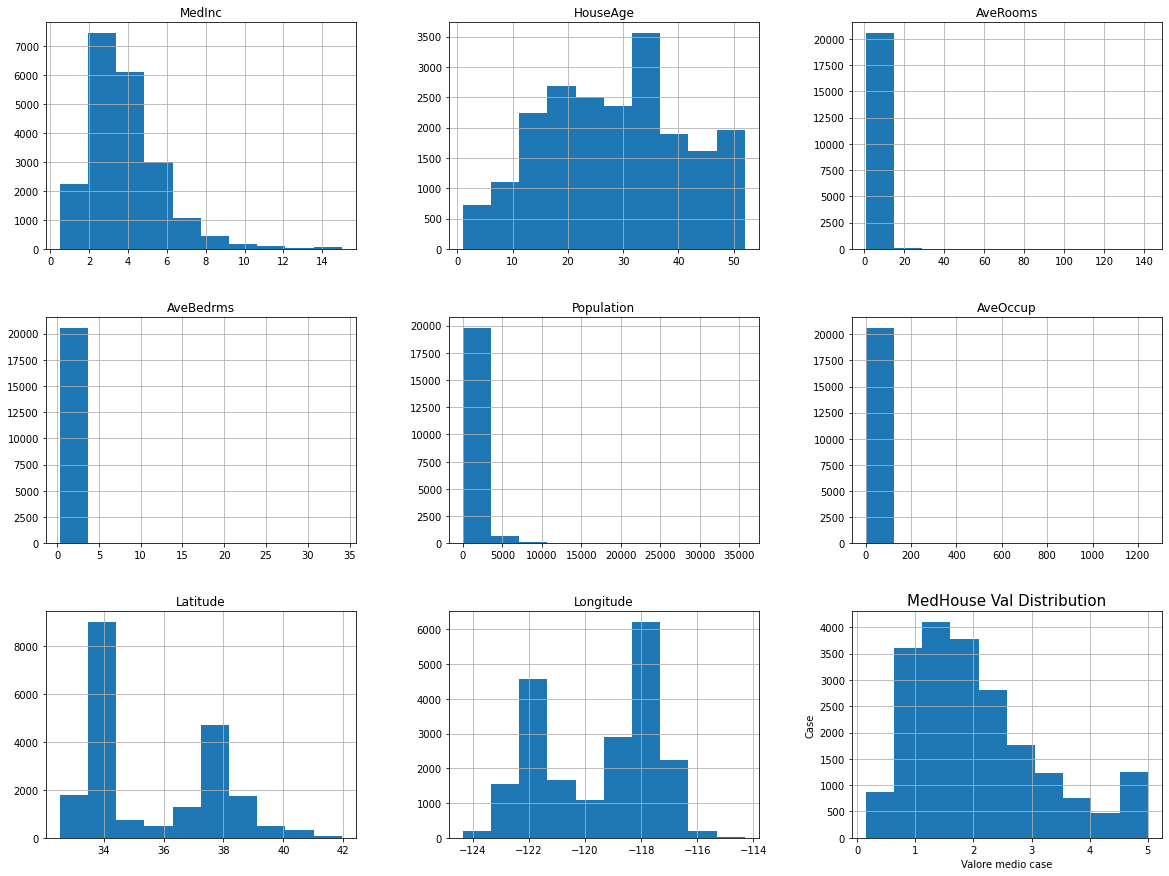

In [64]:
df.hist(figsize=(20,15))
plt.xlabel("Valore medio case")
plt.ylabel("Case")
plt.title("MedHouse Val Distribution", fontsize=15)
plt.show()

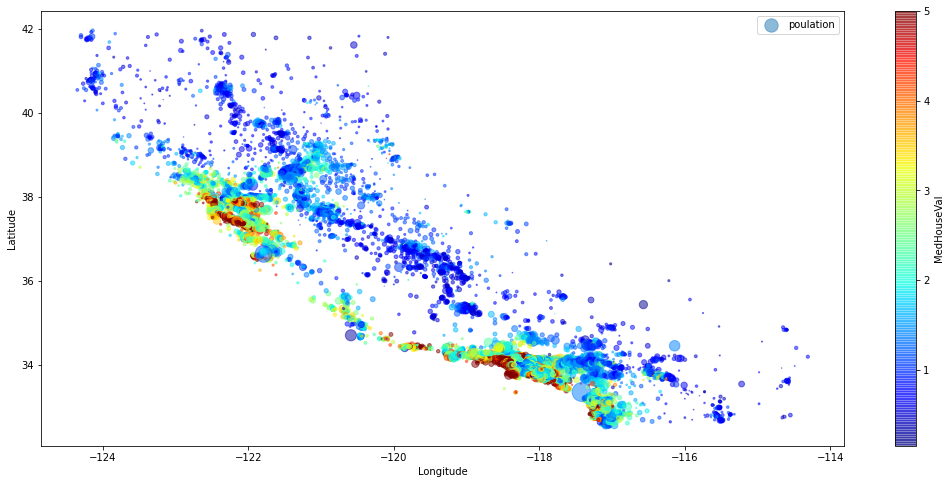

In [65]:
df.plot(
    kind='scatter', 
    x='Longitude', 
    y='Latitude', 
    alpha=0.5, 
    s=df['Population'] / 100, 
    label='poulation', 
    figsize=(18, 8), 
    c="MedHouseVal",
    cmap=plt.get_cmap("jet"),
    sharex=False)
plt.legend()
plt.show()

Proviamo a dare una visualizzazione preliminare del confronto tra i dati.

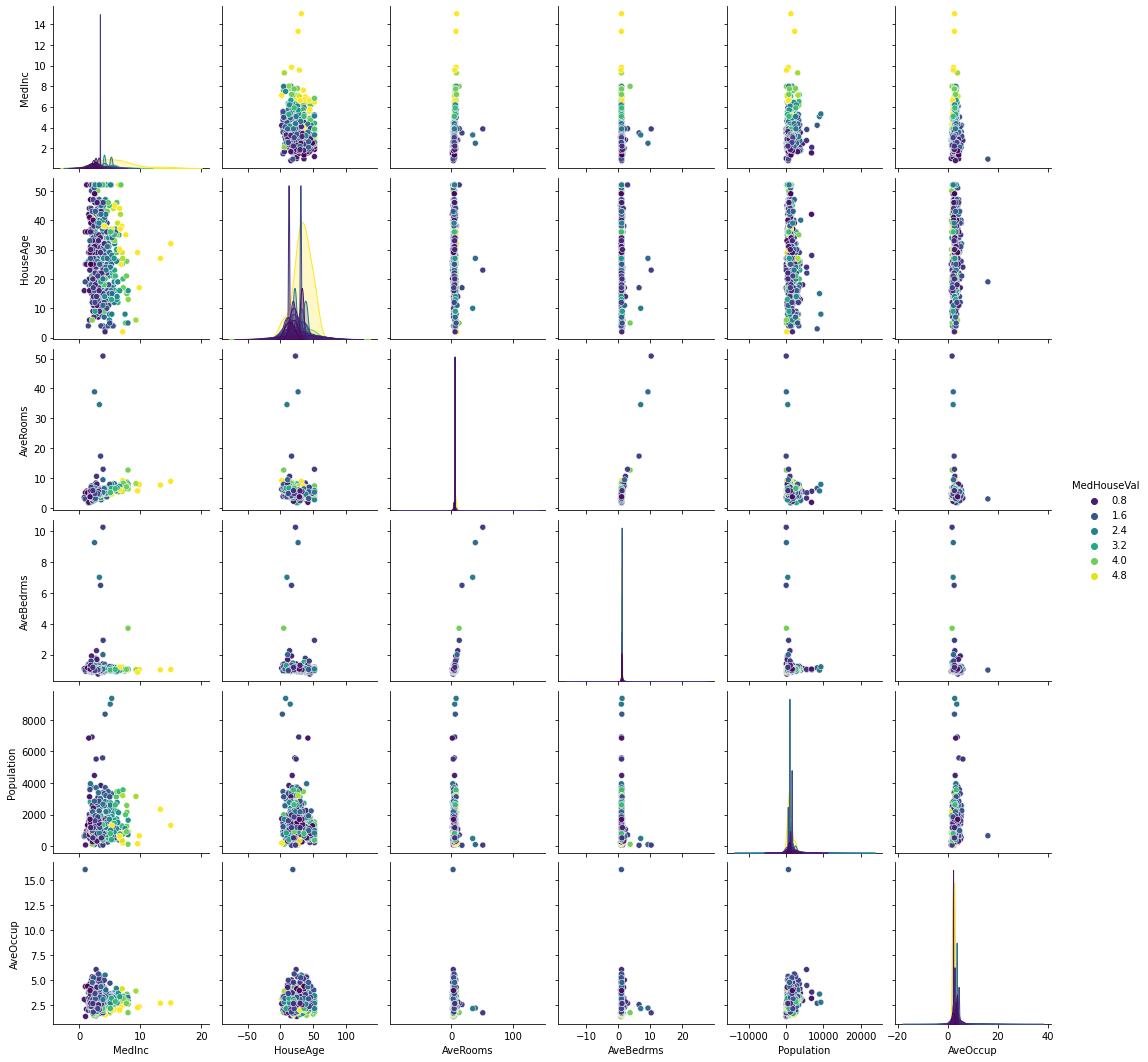

In [66]:
import seaborn as sns


# Essendo il datset molto grande, può essere una buona idea campionarlo randomicamente
# così da ottenere una vista più chiara e semplificata delle distribuzionei
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(df.shape[0]), size=500, replace=False)


# Selezioniamo solo i datai confrontabili.
columns_drop = ["Longitude", "Latitude"]
subset = df.iloc[indices].drop(columns=columns_drop)

# Quantize the target and keep the midpoint for each interval
#sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")
#plt.show()

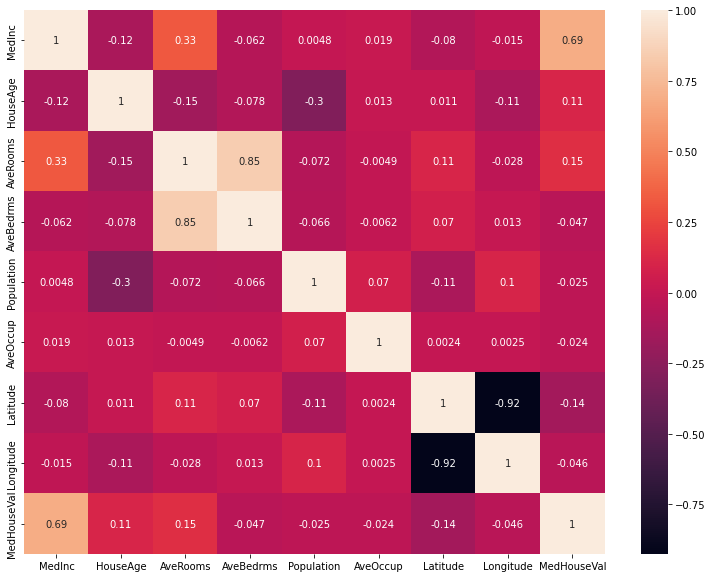

In [67]:

plt.figure(figsize=(13, 10))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

Visto che i valordi di "MedHouseVal" rappresenteranno le etichette del nostro modello, vediamo il grado di correlazione tra questi e il resto del dataset.

In [68]:
corr_labels = corr_matrix['MedHouseVal'].sort_values(ascending=False)
print(corr_labels)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


# **SELEZIONE DELLE FEATURES**

Guardando ai grafici e alle correlazioni salta all'occhio una forte correlazione tra la media delle camere da letto (AveBedrms) e la mdia delle camere in generale (AveRooms).

Questo dato diventa superfluo se cconsideriamo che in una casa c'è almeno una camera da letto. Quindi, essendo "AveBedrms" sotanzialmente contenuto nel dato "AveRooms", può essere eliminato.

In [69]:
df.drop('AveBedrms', axis=1, inplace=True)
display(df)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.847


Un altra correlazione a cui dare attenzione sembra quella tra **MedInc** e **MedHouseVal**

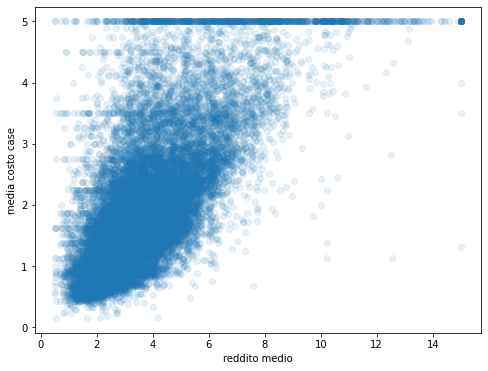

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.1)
plt.xlabel("reddito medio")
plt.ylabel("media costo case")
plt.show()

# **IL PROBLEMA DEI VALORI MANCANTI**

**Regole generali:**
- Una colonna che persenta più del 50% di valori mancanti può essere eliminata.
- Se l'assenza di dato intacca la coerenza di una riga nella tabella, si considera l'eliminazione della riga.
- Si sostiuisce il valore mancante con con la media o la mediana.
- In caso di valori ordinati in modo crescente o decrescente, si sostituisce con la media tra i due primi valori utili a precedere e a seguire il dato mancante.

scikit-learn offre una funzionalità per semplificare la gestione dei dati mancanti: "SimpleImputer" (vedere
sklearn_cheat_sheet).

In [71]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')

for column in df:
  if df[column].isnull().values.any():
    tmp = df[column].to_numpy()
    df[column] = imp_mean.fit_transform(tmp)



In [105]:
# Per fare un check veloce 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   Population   20640 non-null  float64
 4   AveOccup     20640 non-null  float64
 5   Latitude     20640 non-null  float64
 6   Longitude    20640 non-null  float64
 7   MedHouseVal  20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


# **ELIMINAZIONE DEGLI OUTLIER**

**Aerage Rooms**

In [106]:
display(df['AveRooms'].describe())



count    20640.000000
mean         5.349897
std          1.416856
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max         12.851339
Name: AveRooms, dtype: float64

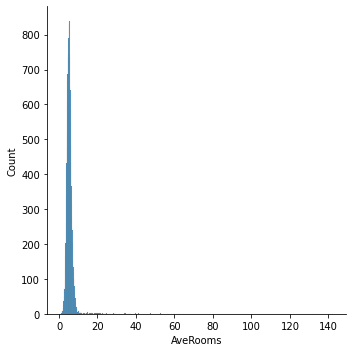

In [74]:

sns.displot(df["AveRooms"])
plt.show()

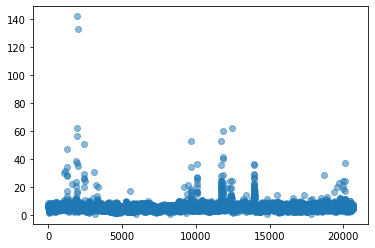

In [75]:
ave_rooms = df["AveRooms"].to_numpy()

plt.scatter(np.arange(ave_rooms.size), ave_rooms, alpha=0.5)
plt.show()

**AveRooms** ha una distribuzione "normale", quindi i suoi valori possono esseere per la maggior parte individuati nel range individuato dalle 3 deviazioni standard.


In [108]:
ave_rooms_up_limit  = ave_rooms.mean() + ( ave_rooms.std() * 3 )
ave_rooms_low_limit = ave_rooms.mean() - ( ave_rooms.std() * 3 )

print("limite superione", ave_rooms_up_limit)
print("limite inferione", ave_rooms_low_limit)

limite superione 9.600360428964056
limite inferione 1.099432741127937


Scegliamo quindi "eliminare" gli outliers sostituendoli con i limiti definiti dalla devizaione standard

In [109]:
ave_rooms[ave_rooms > ave_rooms_up_limit]  = ave_rooms_up_limit
ave_rooms[ave_rooms < ave_rooms_low_limit] = ave_rooms_low_limit



In [78]:
display(df['AveRooms'].describe())


count    20640.000000
mean         5.349897
std          1.416856
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max         12.851339
Name: AveRooms, dtype: float64

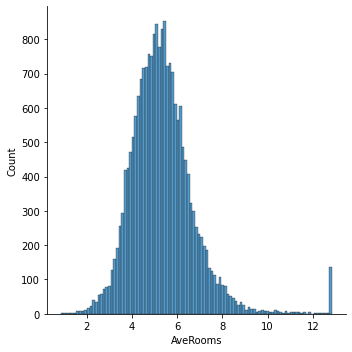

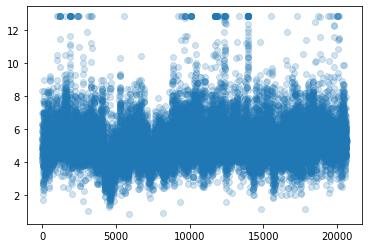

In [79]:


sns.displot(df["AveRooms"])
plt.show()
plt.scatter(np.arange(ave_rooms.size), ave_rooms, alpha=0.2)
plt.show()

**Population**

In [80]:
display(df['Population'].describe())


count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64

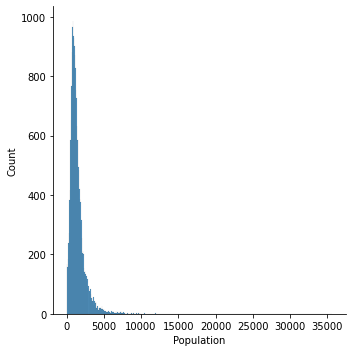

In [81]:
sns.displot(df["Population"])
plt.show()

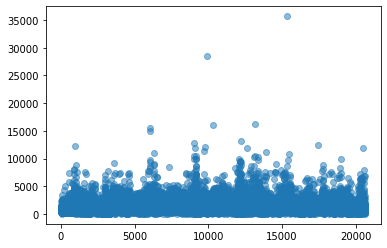

In [82]:
population = df["Population"].to_numpy()

plt.scatter(np.arange(population.size), population, alpha=0.5)
plt.show()

In [110]:
population_perc_25 = np.percentile(population, 25)
population_perc_75 = np.percentile(population, 75)
population_iqr     = population_perc_75 - population_perc_25
print(population_iqr)

938.0


In genere si tagliano tutti i valori che eccedono di una volta il range delimitato dallo spazio interquartile.

In [111]:
pop_range_limit  =  (population_iqr * 1.5)
pop_up_limit  = pop_range_limit + population_perc_75 
pop_low_limit = pop_range_limit - population_perc_25 


population[population > pop_up_limit]  = pop_up_limit
population[population < pop_low_limit] = pop_low_limit


In [112]:
display(df['Population'].describe())


count    20640.000000
mean      1369.887791
std        725.480533
min        620.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max       3132.000000
Name: Population, dtype: float64

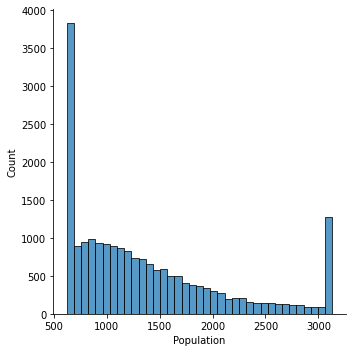

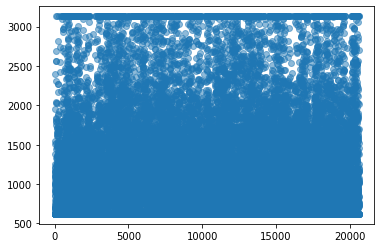

In [113]:
sns.displot(df["Population"])
plt.show()

plt.scatter(np.arange(population.size), population, alpha=0.5)
plt.show()

# **SPLIT DEI DATI E TEST**

## **Features and Labels**
Per prima cosa si spearno i dati dalle etichette.

In [87]:
df_x = df.drop('MedHouseVal', axis=1)
display(df_x)


,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,620.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,620.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,620.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,620.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,620.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32


In [88]:
df_y = df['MedHouseVal']
display(df_y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

## **Training, Validation, Test**

Di norma un set di dati viene suddiviso al più in tre blocchi.

- **Training set**: il set di dati usato in fase di addestramento.
- **Validation set**: il set utilizzato per valutare il modello mentre si regolano gli iperparametri del modello scelto.
- **Test set**: il set usato per la valutazione finale della fase di training.

Facciamo una prima prova senza intervenire ulteriormente nel dataset, basandoci esclusivamente sulla divisione tra ***training set*** e ***test set***.

***train_test_split*** è il modulo di ***scikit-learn*** per lo split dei dati.

In [89]:

from sklearn.model_selection import train_test_split


# separa il dataset in 80% training test 20% test set
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)


In [100]:
print("x train shape: ", x_train.shape)
print("y train shape: ", y_train.shape)

print("x test shape: ", x_test.shape)
print("y test shape: ", y_test.shape)


x train shape:  (16512, 7)
y train shape:  (16512,)
x test shape:  (4128, 7)
y test shape:  (4128,)


## **Regressione Lineare 1**

**training**

In [115]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

**test**

In [116]:

# uso il set di test per predirre dei valori
y_pred_1 = lr.predict(x_test)


**stima dell'errore di approssimazione**


In [117]:
from sklearn.metrics import mean_squared_error

mse_test_1 = mean_squared_error(y_test, y_pred_1)
rmse_test_1 = np.sqrt(mse_test_1)

print(df_y.max(), df_y.min())
print(f"STIMA DELL'ERRORE MEDIO NELLA PREDIZIONE DELLE ETICHETTE: {rmse_test_1}")

5.00001 0.14999
STIMA DELL'ERRORE MEDIO NELLA PREDIZIONE DELLE ETICHETTE: 0.7442768732485857


**punteggio R2**




In [103]:
from sklearn.metrics import r2_score

r2_tst_1 = r2_score(y_test, y_pred_1)


print(f"LE ETICHETTE PREDETTE E DI TEST HANNO LA STESSA VARIANZA AL : {r2_tst_1 * 100:.3f}%")

LE ETICHETTE PREDETTE E DI TEST HANNO LA STESSA VARIANZA AL : 59.261%


**confronto visivo**

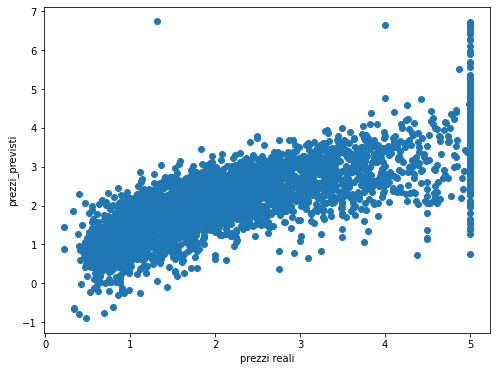

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_1)
plt.xlabel("prezzi reali")
plt.ylabel("prezzi_previsti")
plt.show()

# **Scaling (standardizzazione)**

In [96]:
from scipy.stats import zscore

df_scaled = df.apply(zscore)
display(df_scaled)




,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,1.153449,-1.033668,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.626925,1.421316,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,2.073825,-1.033668,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.329932,-1.033668,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.657780,-1.033668,-0.085616,1.038503,-1.337818,1.172900
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.214877,-0.723521,-0.049110,1.801647,-0.758826,-1.115804
20636,-0.691593,-0.845393,0.539333,-1.033668,0.005021,1.806329,-0.818722,-1.124470
20637,-1.142593,-0.924851,-0.101886,-0.500215,-0.071735,1.778237,-0.823713,-0.992746
20638,-1.054583,-0.845393,-0.014387,-0.866878,-0.091225,1.778237,-0.873626,-1.058608


In [97]:
X = df_scaled.drop('MedHouseVal', axis=1)
display(X)


,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,1.153449,-1.033668,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.626925,1.421316,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,2.073825,-1.033668,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.329932,-1.033668,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.657780,-1.033668,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.214877,-0.723521,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.539333,-1.033668,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.101886,-0.500215,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.014387,-0.866878,-0.091225,1.778237,-0.873626


In [98]:
Y = df_scaled['MedHouseVal']
display(Y)

0        2.129631
1        1.314156
2        1.258693
3        1.165100
4        1.172900
           ...   
20635   -1.115804
20636   -1.124470
20637   -0.992746
20638   -1.058608
20639   -1.017878
Name: MedHouseVal, Length: 20640, dtype: float64